# Assignment 2 - Data Visualization Complementary Views 

## Author - Angela Qiqian Yang 



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

## My work logic
I analysis different data type seperately. In this data set there are three major data types: categorical (GameCode, DayOfWeek), numerical (TablesOcc,  TablesOpen, TableClosed, HeadCount, DayNumber ) and date time (DateFormat).   I examed the relationship within the same data type. In the end I looked up the potential influence between date time, day of work and head counts. 


## My findings
 - <font color = 'red'> Finding 1:  For each game type, within each individual hour during the day, if more tables been occupied in the casino, we could expect more head count in the hour.
 - Find 2: For each game type, within each individual hour during the day, more opened table, more head count in the casino. However, there are big amount of data outliers when open table number is less than 7.
 - Finding 3: For every individual game code and every hour during the day, the most intense head traffic is most likely show up on Wednesday and Friday. 
 - Finding 4: Normally, for all the game, afternoon time has more players than morning. Game Code: CR, S6, TP have relatively more players than other games. And these three games also have wider head count ranges in than other others.
 - Finding 5: The time series plots out total head count per day. The daily head count is normally between 2000 and 5000. The count peaked on mid-March 2012, when it has almost 7000 heads for one day. It expereince immeditely fall in April. The lowest point is at mid-December, when it has lower than 2000. 
 

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
my_df = headcount_df

# Step 1: Data Preparation
Before dive into the data, in order to better analysis the data and avoid data biases (such as over fitting), run below steps to clean data, modify data types, bin numerical values, or even create new data fields.
#### 1. There is no missing data or null data points. 

In [26]:
my_df.isnull().sum()

GameCode        0
DateFormat      0
Hour            0
TablesOcc       0
TablesOpen      0
TablesClosed    0
HeadCount       0
DayOfWeek       0
DayNumber       0
dtype: int64

#### 2. Convert categorical field: DayOfWeek. GameCode is already the categorical field.

In [27]:
my_df['DayOfWeek'] = pd.Categorical(my_df['DayOfWeek'])

In [29]:
my_df.dtypes

GameCode          object
DateFormat        object
Hour               int64
TablesOcc          int64
TablesOpen         int64
TablesClosed       int64
HeadCount          int64
DayOfWeek       category
DayNumber          int64
dtype: object

#### 3. Create new fields 
I creat a new field called "AMPM" to put 24 hours into morning and afternoon period.

In [10]:
my_df['AMPM'] = 'AM'
my_df.loc[my_df['Hour'] >= 12,'AMPM'] = 'PM'

In [11]:
my_df['AMPM'].value_counts()

PM    87900
AM    87777
Name: AMPM, dtype: int64

# Step 2: Numerical Variables Analysis

### 1. Correlation Analysis
Numerical Variables: To detect the relationships among numerical variables, I use correlation heatmap as a first step. From the heat map we can see 'TableOcc', 'TableOpens', and 'HeadCounts' are higher correlated than other variables. 

In [53]:
my_df_corr = my_df[['Hour', 'TablesOcc', 'TablesOpen', 'TablesClosed', 
                    'HeadCount', 'DayNumber']].corr()
my_df_corr

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayNumber
Hour,1.000000,0.150271,0.134911,-0.165562,0.171027,-0.000149
TablesOcc,0.150271,1.000000,0.973488,0.091488,0.932536,0.020292
TablesOpen,0.134911,0.973488,1.000000,0.124094,0.889106,0.029192
TablesClosed,-0.165562,0.091488,0.124094,1.000000,0.043878,-0.028820
HeadCount,0.171027,0.932536,0.889106,0.043878,1.000000,0.014838
DayNumber,-0.000149,0.020292,0.029192,-0.028820,0.014838,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

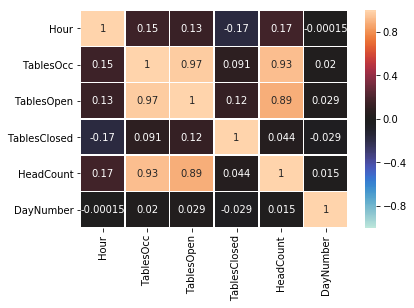

In [47]:
sns.heatmap(my_df_corr, 
            vmin=-1, 
            vmax=1, 
            center=0, 
            annot=True, #show the correlatrion value in cell
            linewidths=.5) 
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

### 2. Table Occupations v.s. Head Count 
#### <font color='red'> Finding 1:  For each game type, within each individual hour during the day, if more tables been occupied in the casino, we could expect more head count in the hour. </font>

Text(0.5,0,'Table Occupation')

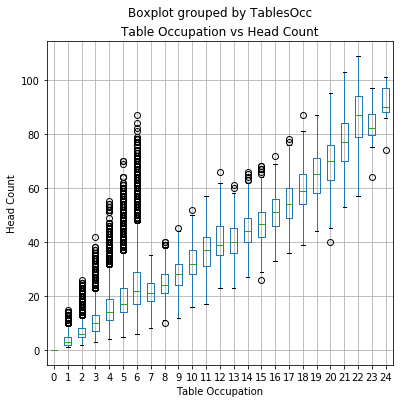

In [246]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
my_df.loc[:,['HeadCount', 'TablesOcc']].boxplot(by = 'TablesOcc', ax = ax)
ax.set_title('Table Occupation vs Head Count') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Table Occupation')

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Table Occupation')

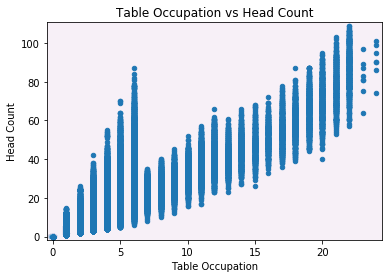

In [174]:
ax = sns.kdeplot(my_df.loc[:, ['TablesOcc', 'HeadCount']], shade = True, cmap = 'PuBu') 
my_df.plot.scatter(x = 'TablesOcc', y = 'HeadCount', ax = ax) #
ax.set_title('Table Occupation vs Head Count') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Table Occupation')

Text(0.5,0,'Table Occupation')

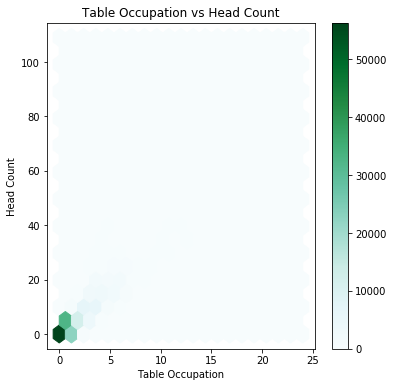

In [249]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
my_df.plot.hexbin(x = 'TablesOcc', y = 'HeadCount', gridsize = 20, ax = ax)
ax.set_title('Table Occupation vs Head Count') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Table Occupation')

### 3. Table Opens v.s. Head Count
#### <font color='red'> Find 2: For each game type, within each individual hour during the day, more opened table, more head count in the casino. However, there are big amount of data outliers when open table number is less than 7. 

Text(0.5,0,'Table Open')

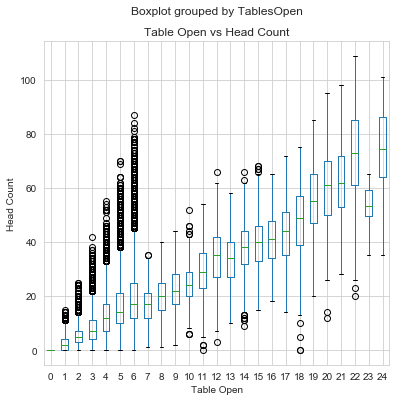

In [16]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
my_df.loc[:,['HeadCount', 'TablesOpen']].boxplot(by = 'TablesOpen', ax = ax)
ax.set_title('Table Open vs Head Count') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Table Open')

Text(0.5,0,'Table Open')

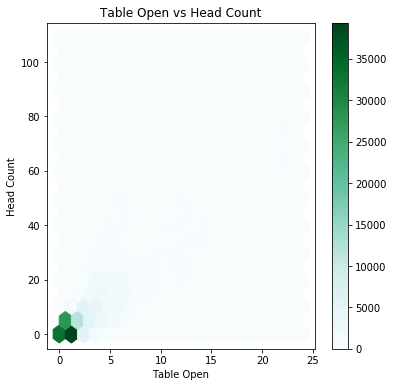

In [253]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
my_df.plot.hexbin(x = 'TablesOpen', y = 'HeadCount', gridsize = 20, ax = ax)
ax.set_title('Table Open vs Head Count') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Table Open')

### 4. Table Closed, Hour(AM, PM) v.s. Head Count 
##### Pair Wide Scatter Plot  
to review the rest numerical variables trend quickly, the pair wide scatter plot is applied here. I use the grouped hours (AM, PM) instead of hours, since I could use it as hue, it will make plot much clear. 

In [ ]:
num_cols = ['TablesClosed', 'HeadCount', 'DayOfWeek',  'AMPM'] 
sns.pairplot(my_df.loc[:, num_cols], hue='AMPM', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

# Step3: Categorical Variables Analysis

### 1. Day of Week v.s. Head Count
#### <font color='red'> Finding 3: For every individual game code and every hour during the day, the most intense head traffic is most likely show up on Wednesday and Friday. </font>

#### Facet Grid

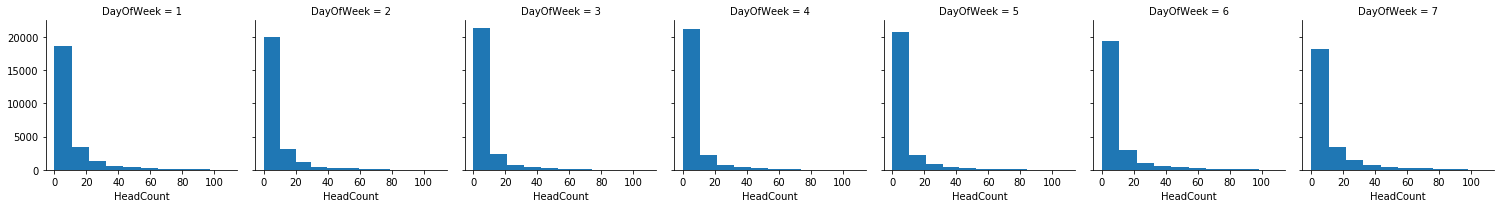

In [64]:
gr = sns.FacetGrid(my_df, col='DayOfWeek')
gr = gr.map(plt.hist, 'HeadCount')

The facet grid plot can't show the changes from monday to sunday very clearly, so I plot the heat map below.

#### Heat Map

In [ ]:
# create bins for headcount, so we don't have so many individual heads 
# we can see it in heat map more clearly. 
my_df.loc[:, 'HeadCount_bin'] = pd.cut(my_df.loc[:, 'HeadCount'], bins = 10, labels = range(10))
my_df.iloc[:,'HeadCount_bin']

In [222]:
my_df_DayOfWeek = pd.crosstab(my_df.loc[:, 'HeadCount_bin'], my_df.loc[:, 'DayOfWeek'])

In [223]:
my_df_DayOfWeek

DayOfWeek,1,2,3,4,5,6,7
HeadCount_bin,,,,,,,
0,18632,20661,21433,21172,20808,19400,18167
1,3456,2739,2384,2211,2371,3041,3459
2,1259,968,774,716,842,1076,1530
3,583,450,411,418,407,527,649
4,418,272,233,197,256,408,403
5,253,169,117,112,116,236,290
6,158,87,71,59,98,133,222
7,108,43,32,42,44,82,149
8,54,13,8,12,15,58,90


Text(0.5,1,'Head Count ranges by days of the week')

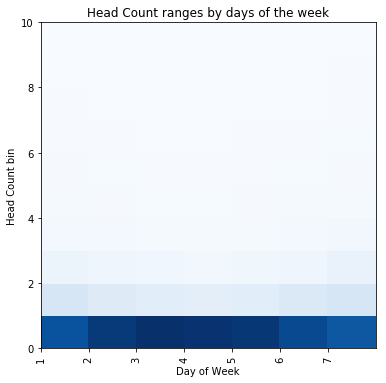

In [224]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
ax.pcolor(my_df_DayOfWeek, cmap = 'Blues')
ax.set_xticks(range(my_df_DayOfWeek.shape[1])) 
ax.set_xticklabels(my_df_DayOfWeek.columns, rotation=90)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Head Count bin')
ax.set_title('Head Count ranges by days of the week')

### 2. Game Type, Hours v.s. Head Counts
#### <font color='red'> Finding 4: Normally, for all the game, afternoon time has more players than morning. Game Code: CR, S6, TP have relatively more players than other games. And these three games also have wider head count ranges in than other others. </font>
#### Violin Plot

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Head Count')

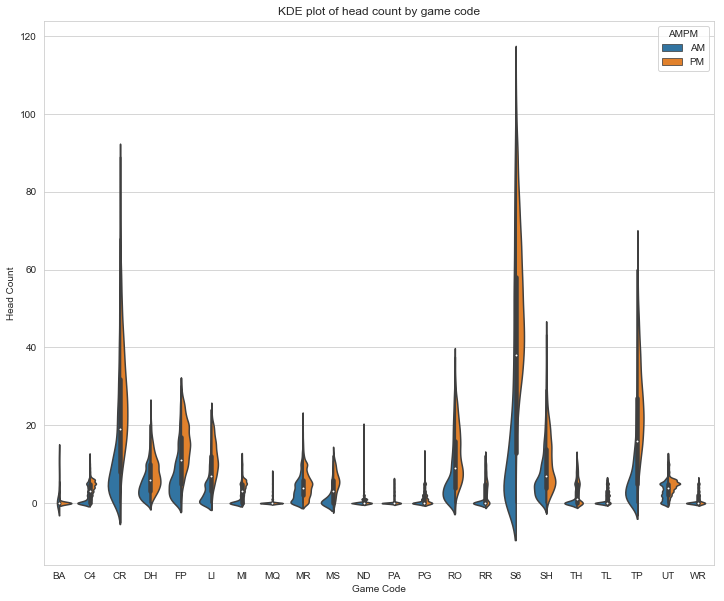

In [15]:
fig = plt.figure(figsize=(12,10)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'GameCode', y = 'HeadCount', hue = 'AMPM',
               data = my_df, ax = ax, split=True)
ax.set_title('KDE plot of head count by game code') # Give the plot a main title
ax.set_xlabel('Game Code') # Set text for the x axis
ax.set_ylabel('Head Count')# Set text for y axis

# Step 5: Date Variables Analysis
#### <font color='red'> Finding 5: The time series plots out total head count per day. The daily head count is normally between 2000 and 5000. The count peaked on mid-March 2012, when it has almost 7000 heads for one day. It expereince immeditely fall in April. The lowest point is at mid-December, when it has lower than 2000. </font>
#### Time Series Plot

In [ ]:
# set the date time from original data format in datetime format, so we can plot it as time series 
my_df.loc[:, 'date'] = pd.to_datetime(my_df.loc[:, 'DateFormat'])

In [159]:
my_df.shape

(175677, 10)

In [160]:
# group by date and sum up headcount, because the original data records is hourly based. 
# the time hourly data will not give us a clean line in time series plot
my_df_time = my_df.groupby(['date'])['date','HeadCount'].sum() #just keep the fields/info I want. 
my_df_time = pd.DataFrame(my_df_time)
print(my_df_time.head())
print(my_df_time.tail())

            HeadCount
date                 
2011-08-01       3203
2011-08-02       2932
2011-08-03       2640
2011-08-04       2800
2011-08-05       3419
            HeadCount
date                 
2012-07-27       3915
2012-07-28       4789
2012-07-29       4482
2012-07-30       3318
2012-07-31       3188


Text(0.5,1,'Time series of head count in casino')

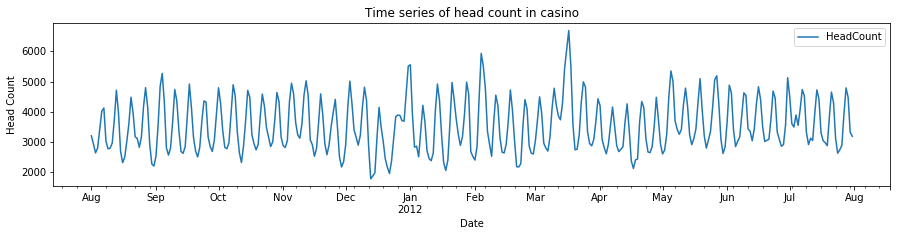

In [156]:
ax = plt.figure(figsize=(15, 3)).gca() # define axis
my_df_time.plot(ax = ax, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Head Count')
ax.set_title('Time series of head count in casino')

In [ ]:
print('analysis finsihed')